# 鸢尾花的分类

In [70]:
## 导包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [71]:
## 超参数
epochs=5
validation_split=0.05
test_size=0.25
dense1_neurons =512 #第一层神经元的数量
dense2_neurons =256 #第二层神经元的数量
dense3_neurons =128 #第三层神经元的数量

## 1.提出问题

根据整理好的鸢尾花数据集，能够进行三种鸢尾花的分类。

## 2.数据的收集和整理

### 2.1 导入数据集

In [72]:
datasets_path = 'data/iris.data'
iris = pd.read_csv(datasets_path,header=None)
iris.columns =['sepel_length','sepel_width','petal_length','petal_width','species']
print(iris.sample(5))

    sepel_length  sepel_width  petal_length  petal_width          species
98           5.1          2.5           3.0          1.1  Iris-versicolor
78           6.0          2.9           4.5          1.5  Iris-versicolor
88           5.6          3.0           4.1          1.3  Iris-versicolor
68           6.2          2.2           4.5          1.5  Iris-versicolor
26           5.0          3.4           1.6          0.4      Iris-setosa


### 2.2 将标签转化为one-hot编码

In [73]:
# 对species进行one-hot编码
one_hot_species = pd.get_dummies(iris['species'], prefix='species')
# 随机输出5行，查看效果
one_hot_species.sample(5)

,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
5,1,0,0
14,1,0,0
22,1,0,0
63,0,1,0
83,0,1,0


In [74]:
#  原来的数据进行拼接
one_hot_data = pd.concat([iris,one_hot_species], axis=1)
# 随机输出5行，查看效果
one_hot_data.sample(5)

,sepel_length,sepel_width,petal_length,petal_width,species,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
99,5.7,2.8,4.1,1.3,Iris-versicolor,0,1,0
84,5.4,3.0,4.5,1.5,Iris-versicolor,0,1,0
128,6.4,2.8,5.6,2.1,Iris-virginica,0,0,1
132,6.4,2.8,5.6,2.2,Iris-virginica,0,0,1
25,5.0,3.0,1.6,0.2,Iris-setosa,1,0,0


In [75]:
#  删除原来的species列
one_hot_data = one_hot_data.drop('species', axis=1)
# 随机输出5行，查看效果
one_hot_data.sample(5)

,sepel_length,sepel_width,petal_length,petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
44,5.1,3.8,1.9,0.4,1,0,0
36,5.5,3.5,1.3,0.2,1,0,0
12,4.8,3.0,1.4,0.1,1,0,0
28,5.2,3.4,1.4,0.2,1,0,0
50,7.0,3.2,4.7,1.4,0,1,0


In [28]:
#  对species进行one-hot编码
one_hot_species = pd.get_dummies(iris['species'], prefix='species')
#  原来的数据进行拼接
one_hot_data = pd.concat([iris,one_hot_species], axis=1)
#  删除原来的species列
one_hot_data = one_hot_data.drop('species', axis=1)
#  随机输出5行，查看效果
one_hot_data.sample(5)

,sepel_length,sepel_width,petal_length,petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
141,6.9,3.1,5.1,2.3,0,0,1
149,5.9,3.0,5.1,1.8,0,0,1
82,5.8,2.7,3.9,1.2,0,1,0
96,5.7,2.9,4.2,1.3,0,1,0
38,4.4,3.0,1.3,0.2,1,0,0


### 2.3 分割特征和标签

In [76]:
# 提取特征
features = one_hot_data.iloc[:,0:4]
print("\n=====显示前5行特征=====")
print(features.head())


=====显示前5行特征=====
   sepel_length  sepel_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [77]:
# 提取标签
labels = one_hot_data.iloc[:,4:]
print("\n=====显示前5行标签=====")
print(labels.head())


=====显示前5行标签=====
   species_Iris-setosa  species_Iris-versicolor  species_Iris-virginica
0                    1                        0                       0
1                    1                        0                       0
2                    1                        0                       0
3                    1                        0                       0
4                    1                        0                       0


In [78]:
features = np.array(features)
labels = np.array(labels)

In [79]:
print("特征集的形状：",features.shape)
print("标签集的形状：",labels.shape)

特征集的形状： (150, 4)
标签集的形状： (150, 3)


### 2.4 分割训练集和测试集

In [80]:
# 拆分训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size=test_size)
print("训练特征集的形状：" + str(X_train.shape))
print("训练标签集的形状：" + str(y_train.shape))
print("测试特征集的形状：" + str(X_test.shape))
print("测试标签集的形状：" + str(y_test.shape))

训练特征集的形状：(112, 4)
训练标签集的形状：(112, 3)
测试特征集的形状：(38, 4)
测试标签集的形状：(38, 3)


## 3.搭建模型

In [90]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=3, input_dim=4,activation="softmax"))
model.summary()  # 查看模型结构

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [91]:
# 编译模型
model.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])

In [92]:
epochs=100
# 训练模型
history = model.fit(X_train,y_train,validation_split=validation_split,epochs=epochs)

Epoch 1/100
4/4 [==============================] - 0s 41ms/step - loss: 4.6574 - accuracy: 0.3585 - val_loss: 6.0999 - val_accuracy: 0.1667
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 3.5217 - accuracy: 0.3585 - val_loss: 4.3069 - val_accuracy: 0.1667
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 2.3358 - accuracy: 0.3585 - val_loss: 2.8850 - val_accuracy: 0.1667
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 1.5522 - accuracy: 0.3585 - val_loss: 2.0613 - val_accuracy: 0.1667
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 1.1887 - accuracy: 0.3962 - val_loss: 1.5708 - val_accuracy: 0.1667
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 1.0022 - accuracy: 0.5943 - val_loss: 1.3328 - val_accuracy: 0.1667
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 0.9276 - accuracy: 0.5660 - val_loss: 1.1419 - val_accuracy: 0.0000e+00
Epoch 8/100
4/4 

4/4 [==============================] - 0s 10ms/step - loss: 0.5279 - accuracy: 0.7830 - val_loss: 0.7710 - val_accuracy: 0.5000
Epoch 60/100
4/4 [==============================] - 0s 10ms/step - loss: 0.5270 - accuracy: 0.7925 - val_loss: 0.7945 - val_accuracy: 0.5000
Epoch 61/100
4/4 [==============================] - 0s 9ms/step - loss: 0.5324 - accuracy: 0.7547 - val_loss: 0.7725 - val_accuracy: 0.5000
Epoch 62/100
4/4 [==============================] - 0s 9ms/step - loss: 0.5254 - accuracy: 0.7830 - val_loss: 0.8203 - val_accuracy: 0.3333
Epoch 63/100
4/4 [==============================] - 0s 10ms/step - loss: 0.5249 - accuracy: 0.7170 - val_loss: 0.7766 - val_accuracy: 0.5000
Epoch 64/100
4/4 [==============================] - 0s 9ms/step - loss: 0.5237 - accuracy: 0.7736 - val_loss: 0.7266 - val_accuracy: 0.5000
Epoch 65/100
4/4 [==============================] - 0s 9ms/step - loss: 0.5145 - accuracy: 0.8491 - val_loss: 0.7431 - val_accuracy: 0.3333
Epoch 66/100
4/4 [============

In [117]:
dense1_neurons =64 #第一层神经元的数量
dense2_neurons =32 #第二层神经元的数量
# 搭建模型
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=dense1_neurons,input_dim=4,activation='relu'))
model.add(tf.keras.layers.Dense(units=dense2_neurons,activation='relu'))
model.add(tf.keras.layers.Dense(units=3,activation="softmax"))
model.summary()  

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_24 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_25 (Dense)             (None, 3)                 99        
Total params: 2,499
Trainable params: 2,499
Non-trainable params: 0
_________________________________________________________________


In [118]:
# 编译模型
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [119]:
epochs=50
# 训练模型
history = model.fit(X_train,y_train,validation_split=validation_split,epochs=epochs)

Epoch 1/50
4/4 [==============================] - 0s 45ms/step - loss: 1.3408 - accuracy: 0.3302 - val_loss: 1.4066 - val_accuracy: 0.1667
Epoch 2/50
4/4 [==============================] - 0s 11ms/step - loss: 1.0050 - accuracy: 0.5849 - val_loss: 1.1532 - val_accuracy: 0.3333
Epoch 3/50
4/4 [==============================] - 0s 16ms/step - loss: 0.8615 - accuracy: 0.6887 - val_loss: 1.0105 - val_accuracy: 0.3333
Epoch 4/50
4/4 [==============================] - 0s 12ms/step - loss: 0.8064 - accuracy: 0.6887 - val_loss: 0.9164 - val_accuracy: 0.3333
Epoch 5/50
4/4 [==============================] - 0s 9ms/step - loss: 0.7708 - accuracy: 0.6887 - val_loss: 0.8465 - val_accuracy: 0.3333
Epoch 6/50
4/4 [==============================] - 0s 11ms/step - loss: 0.7293 - accuracy: 0.6887 - val_loss: 0.8164 - val_accuracy: 0.3333
Epoch 7/50
4/4 [==============================] - 0s 11ms/step - loss: 0.6937 - accuracy: 0.7075 - val_loss: 0.7951 - val_accuracy: 0.3333
Epoch 8/50
4/4 [============

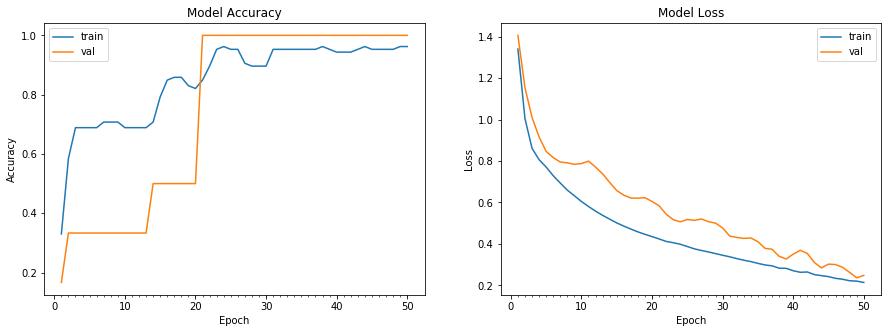

In [120]:
plot_model_history(history)

In [103]:
# 使用测试集进行评估
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.0933 - accuracy: 1.0000


[0.09331685304641724, 1.0]

### 3.1 搭建模型

In [38]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=dense1_neurons,input_dim=4,activation='relu'))
model.add(tf.keras.layers.Dense(units=dense2_neurons,activation='relu'))
model.add(tf.keras.layers.Dense(units=dense3_neurons,activation='relu'))
#model.add(tf.keras.layers.Dropout(dropout_rate))
model.add(tf.keras.layers.Dense(units=3,activation="softmax"))
model.summary()  # 查看模型结构

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               2560      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total params: 167,171
Trainable params: 167,171
Non-trainable params: 0
_________________________________________________________________


###  3.2 编译模型

In [39]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

### 3.3 训练模型

In [43]:
history = model.fit(X_train,y_train,validation_split=validation_split,epochs=epochs)

Epoch 1/5
4/4 [==============================] - 0s 19ms/step - loss: 0.0148 - accuracy: 0.9906 - val_loss: 0.0472 - val_accuracy: 1.0000
Epoch 2/5
4/4 [==============================] - 0s 14ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0282 - val_accuracy: 1.0000
Epoch 3/5
4/4 [==============================] - 0s 10ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0353 - val_accuracy: 1.0000
Epoch 4/5
4/4 [==============================] - 0s 10ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.0872 - val_accuracy: 1.0000
Epoch 5/5
4/4 [==============================] - 0s 11ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.0318 - val_accuracy: 1.0000


## 4.评估模型

In [84]:
def plot_model_history(model_history):
    '''
    功能：根据history对象，绘制训练集和验证集上loss和acc的变化图
    参数：history对象
    来源：https://www.tensorflow.org/tutorials/keras/basic_classification?hl=zh-cn 
    '''
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

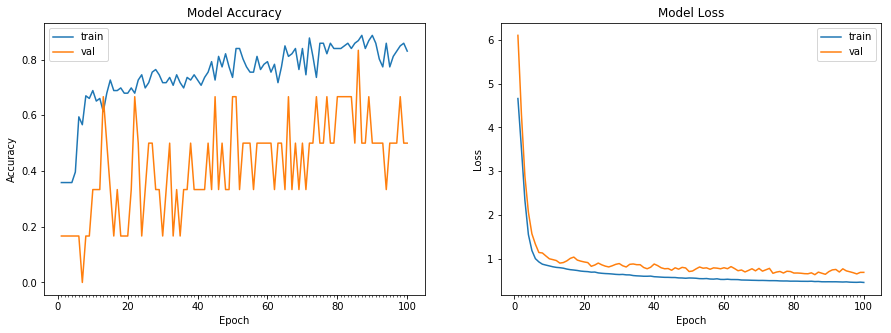

In [93]:
plot_model_history(history)

In [50]:
# 使用测试集进行评估
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.1807 - accuracy: 0.9474


[0.1806722730398178, 0.9473684430122375]

## 5.使用模型

In [51]:
target = model.predict(np.array([[7,5.5,6.5,3.9]])).argmax()
if target == 0:
    print("Iris-setosa")
elif target == 1:
    print("Iris-versicolor")
else:
    print("Iris-virginica")

Iris-virginica
